Florian Quintin
Project 2

Nous alons voire dans se rapport un approffonisement de l'étude précédament menné 

Pour rappel : nous avons mie relation les passagers qui ont survécue et leurs lieux d'embarquement

1) Southampton (en Angletaire): le premier lieux d'embarquement ou 72.4% des passager on embarquer

2) Cherbourg (en France): ou 18.9% des passager embarque

3) Queenstown (en Irlande): ou enfin 7.8% du reste des passagers embarqués avant de se lancer vers sa transe atlantique

se pourcentage indique la répartition des passagers du fichier train.csv on remarque que cette répartition n'est pas totalement répartie cela est dû à un manque de données sur certains passagers (1.1%) ce nombre est suffisamment faible pour que l'on puisse l'ignorer.

In [2]:
# importation des différentes librairies
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import math as mt
%matplotlib inline
import csv as csv

df = pd.read_csv('../P1/train.csv', header=0)

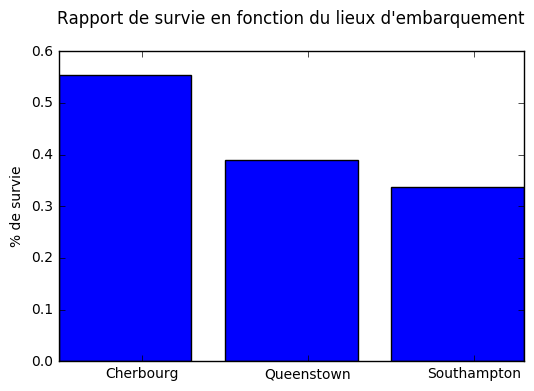

('Cherbourg :', 0.5535714285714286, '%')
('Queenstown :', 0.38961038961038963, '%')
('Southampton :', 0.33695652173913043, '%')


In [3]:
PassageSurvived = df["Survived"] == 1

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbEmbarkedC = len(df[Cherbourg])
NbEmbarkedQ = len(df[Queenstown])
NbEmbarkedS = len(df[Southampton])

NbSurvivedC = len(df[ PassageSurvived & Cherbourg ])
NbSurvivedQ = len(df[ PassageSurvived & Queenstown ])
NbSurvivedS = len(df[ PassageSurvived & Southampton ])

RaportC = float(NbSurvivedC) / float(NbEmbarkedC)
RaportQ = float(NbSurvivedQ) / float(NbEmbarkedQ)
RaportS = float(NbSurvivedS) / float(NbEmbarkedS)

#construction du diagramme
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Rapport de survie en fonction du lieux d\'embarquement\n')
ax.set_ylabel('% de survie')
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
ax.set_xticks([0.5, 1.5, 2.5])

listData = [RaportC, RaportQ, RaportS]
ax.bar(range(len(listData)), listData)
plt.show()

print('Cherbourg :', RaportC, '%')
print('Queenstown :', RaportQ, '%')
print('Southampton :', RaportS, '%')

Maintenant nous alons voir des relations posible avec le lieux d'embarquement des passagés

La première des relations à faire

In [21]:
# donnée

PassageMale = df["Sex"] == "male"
PassageFemale = df["Sex"] == "female"

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbMaleC = len(df[ PassageMale & Cherbourg ])
NbMaleQ = len(df[ PassageMale & Queenstown ])
NbMaleS = len(df[ PassageMale & Southampton ])

NbFemaleC = len(df[ PassageFemale & Cherbourg ])
NbFemaleQ = len(df[ PassageFemale & Queenstown ])
NbFemaleS = len(df[ PassageFemale & Southampton ])

totalC = NbMaleC + NbFemaleC
totalQ = NbMaleQ + NbFemaleQ
totalS = NbMaleS + NbFemaleS

RaportMaleC = float(NbMaleC) * 100 / float(totalC)
RaportMaleQ = float(NbMaleQ) * 100 / float(totalQ)
RaportMaleS = float(NbMaleS) * 100 / float(totalS)

RaportFemaleC = float(NbFemaleC) * 100 / float(totalC)
RaportFemaleQ = float(NbFemaleQ) * 100 / float(totalQ)
RaportFemaleS = float(NbFemaleS) * 100 / float(totalS)

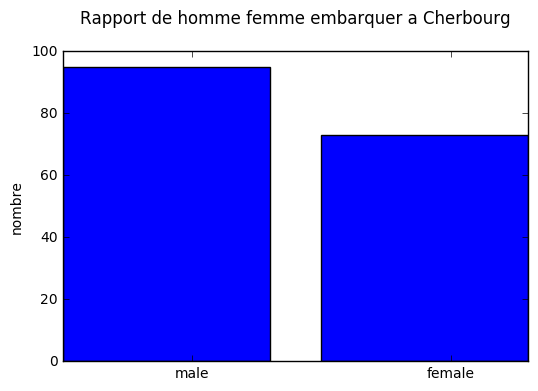

('rapport de male :', 56.54761904761905, '%')
('rapport de female :', 43.45238095238095, '%')


In [20]:
# diagramme pour Cherbourg
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Rapport de homme femme embarquer a Cherbourg\n')
ax.set_ylabel('nombre')
ax.set_xticklabels(['male', 'female'])
ax.set_xticks([0.5, 1.5])

listDataC = [NbMaleC, NbFemaleC]
ax.bar(range(len(listDataC)), listDataC)
plt.show()

print('rapport de male :', RaportMaleC, '%')
print('rapport de female :', RaportFemaleC, '%')

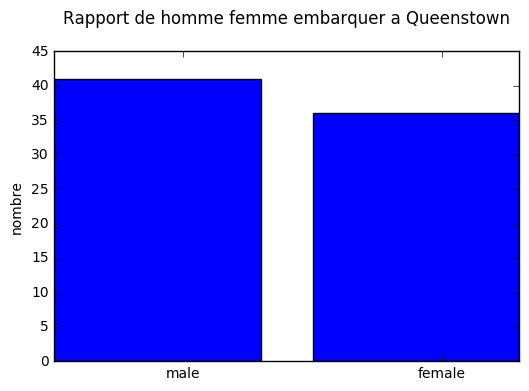

('rapport de male :', 53.246753246753244, '%')
('rapport de female :', 46.753246753246756, '%')


In [19]:
# diagramme pour Queenstown
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Rapport de homme femme embarquer a Queenstown\n')
ax.set_ylabel('nombre')
ax.set_xticklabels(['male', 'female'])
ax.set_xticks([0.5, 1.5])

listDataQ = [NbMaleQ, NbFemaleQ]
ax.bar(range(len(listDataQ)), listDataQ)
plt.show()

print('rapport de male :', RaportMaleQ, '%')
print('rapport de female :', RaportFemaleQ, '%')

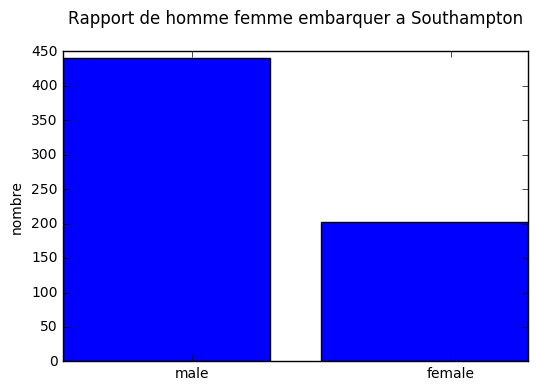

('rapport de male :', 68.47826086956522, '%')
('rapport de female :', 31.52173913043478, '%')


In [22]:
# diagramme pour Southampton
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Rapport de homme femme embarquer a Southampton\n')
ax.set_ylabel('nombre')
ax.set_xticklabels(['male', 'female'])
ax.set_xticks([0.5, 1.5])

listDataS = [NbMaleS, NbFemaleS]
ax.bar(range(len(listDataS)), listDataS)
plt.show()

print('rapport de male :', RaportMaleS, '%')
print('rapport de female :', RaportFemaleS, '%')

Ce rapport d'homme / femme, suivant le lieu d'embarquement n'explique pas le taux de survie important des passagers qui ont embarqués à Cherbourg.

En revanche, on peut constater une inégalité importante pour les passagers qui ont embarquent à Southampton, en effet 68.5 % d'entre eux sont des Hommes. Ils se trouvent que l'on sait que les hommes avaient un très faible taux de survie dû à la priorité des femmes dans les canaux de sauvetage et se-ci pourrait peut-être expliquer le taux de survie faible des personnes de Southampton (33.6 %).